<a href="https://colab.research.google.com/github/fash098/Netflix_Movies_TVShows_Clustering/blob/main/Netflix_Movies_TVShows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering


##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third - party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled.

Integrating this dataset with other external datasets such as IMBD ratings, rotten tomatoes can also provide many interesting findings.

In this project, we will :

A) Perform Exploratory Data Analysis

B) Understand the types of contents available in different countries

C) See if Netflix has been increasingly focusing on TV rather than movies in recent years

D) Cluster similar content by matching text based features


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Netflix is a popular streaming service with a vast library of shows and movies available for a monthly fee. Users can enjoy original content and create personalized profiles. The option to download content is handy for travelers or those with limited internet access. As of Q2 2022, over 220 million people have subscribed to Netflix, making it the world's largest OTT provider. To enhance user satisfaction and retention, efficient clustering of shows is crucial.

Creating clusters helps identify similarities and differences between shows. This information can be used to offer personalized recommendations to customers based on their preferences. The goal of this project is to categorize Netflix shows into distinct clusters, ensuring that shows within a cluster share similarities, while those in different clusters are dissimilar.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [107]:
# Import Libraries
# Important modules
import pandas as pd
import numpy as np

#visulizaiton modules
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
import geopandas as gpd
!pip install country_converter --upgrade
import country_converter as coco
import plotly.express as px

#import string module
import string
string.punctuation

#import stats module
from scipy import stats

#nlp module
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

#import fundamental models
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer

#import warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [108]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone_Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')

### Dataset First View

In [110]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [111]:
# Viewing the last 5 rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [112]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [113]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [114]:
# Dataset Duplicate Value Count
duplicate_value = len(df[df.duplicated()])
print(duplicate_value)

0


#### Missing Values/Null Values

In [115]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

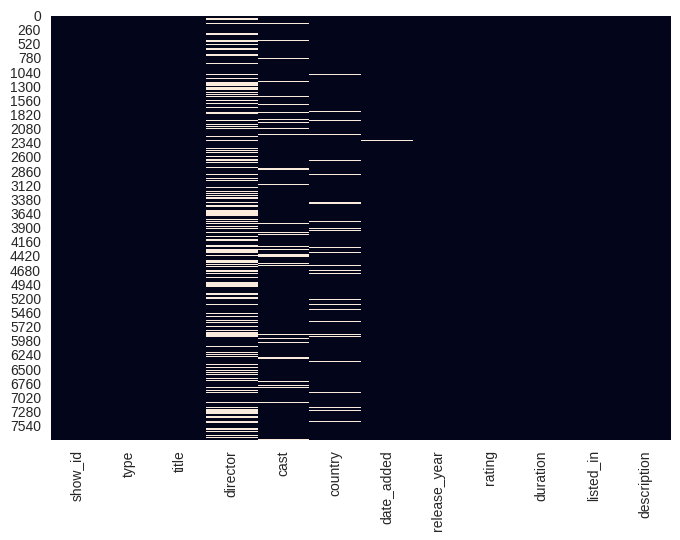

In [116]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

- The dataset comprises 7787 rows and 12 columns. The columns for director, cast, country, date_added, and rating have some missing values. No duplicate values are present in the dataset.

- Since each row corresponds to a specific movie, there's no viable method for imputing null values. Given the dataset's relatively small size, we aim to retain all available data. Thus, after thorough column analysis, we opt to replace missing numeric values with an empty string in our approach.

## ***2. Understanding Your Variables***

In [117]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [118]:
# Dataset Describe
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

- show_id : Unique ID for every Movie/Show
- type : Identifier - Movie/Show
- title : Title of the Movie/Show
- director : Director of the Movie/Show
- cast : Actors involved in the Movie/Show
- country : Country where the Movie/Show was produced
- date_added : The Date in which it was added on Netflix
- release_year : Actual Release year of the Movie/Show
- rating : TV Rating of the Movie/Show
- duration : Total Duration or runtime - in minutes or number of seasons
- listed_in : Genre of the Movie/Show
- description : The Summary description

### Check Unique Values for each variable.

In [119]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  show_id is 7787
No. of unique values in  type is 2
No. of unique values in  title is 7787
No. of unique values in  director is 4049
No. of unique values in  cast is 6831
No. of unique values in  country is 681
No. of unique values in  date_added is 1565
No. of unique values in  release_year is 73
No. of unique values in  rating is 14
No. of unique values in  duration is 216
No. of unique values in  listed_in is 492
No. of unique values in  description is 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [120]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 | Exploring the feature 'Type'

In [121]:

# number of values of different categories in 'type'
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

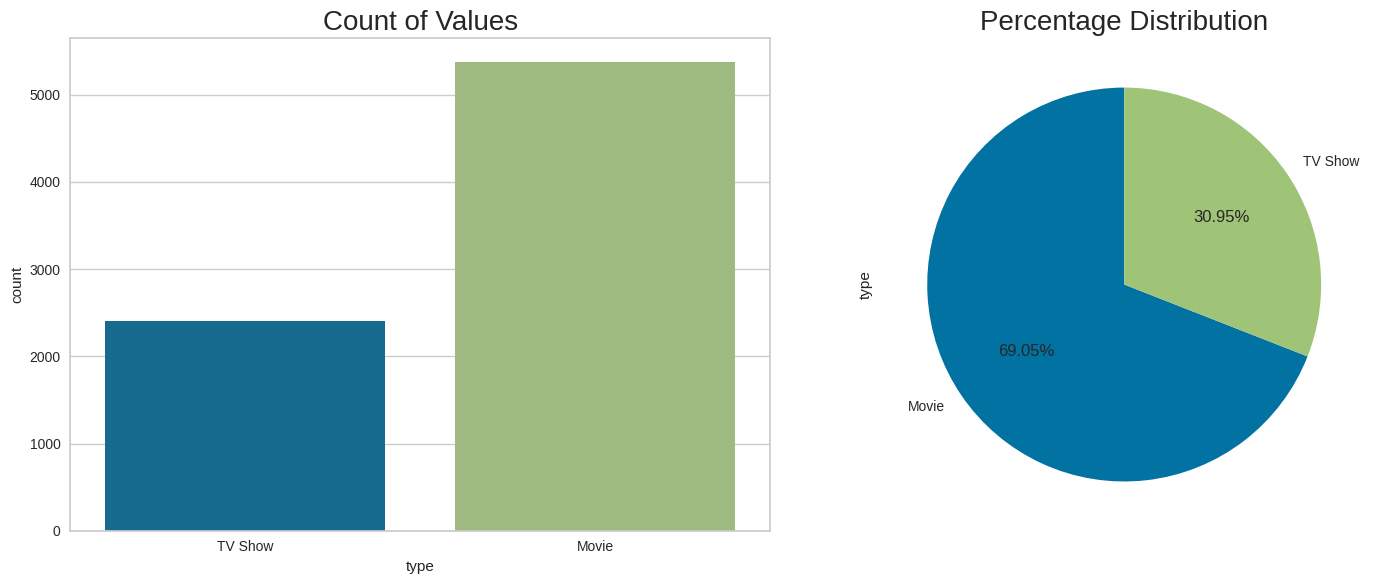

In [122]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# countplot
graph = sns.countplot(x = 'type', data = df, ax=ax[0])
graph.set_title('Count of Values', size=20)

# piechart
df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(15,6),startangle=90)
plt.title('Percentage Distribution', size=20)

plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

We used Bar Chart and Pie Chart for the visualization.

##### 2. What is/are the insight(s) found from the chart?

- From the plots we can understand that Netflix hosts Movies more than TV Shows.
- 69.05% of the total content is movies and 30.95% of content is TV Shows.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This must mean Netflix collaborates more with Movie productions than that of TV Shows. This could be because of the audience preferences. We will get a better clarity as we move along.

#### Chart - 2 | Exploring the feature 'Title'

In [123]:
# Chart - 2 visualization code
# number of unique values
df['title'].nunique()

7787

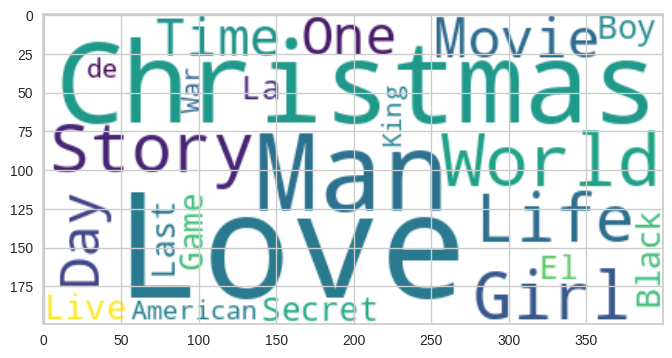

In [124]:
# text documents
text = " ".join(word for word in df['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?


Wordcloud is basically a visualization technique to represent the frequency of words in a text where the size of the word represents its frequency.

##### 2. What is/are the insight(s) found from the chart?

Words like 'Love', 'Christmas', 'Man', 'World', 'Life', 'Girl', and 'Story', 'One', 'Movies', etc.. are frequently used in the title column of Movies/ TV Shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These words are popular which means titles with these words have higher chances of being picked from the vast variety of movies/tv shows offered by the streaming platform.

#### Chart - 3 | Exploring the feature 'Director'

In [125]:
# Chart - 3 visualization code

print(f'number of unique directors in the column: {df.director.nunique()}')
print(f'null values in the column : {df.director.isna().sum()}')

number of unique directors in the column: 4049
null values in the column : 2389


In [126]:
print(f"Number of Movies directed by unique directors are : { df[df['type']=='TV Show']['director'].value_counts().sum()}")
print(f"Number of TV shows directed by unique directors are : { df[df['type']=='Movie']['director'].value_counts().sum()}")

Number of Movies directed by unique directors are : 184
Number of TV shows directed by unique directors are : 5214


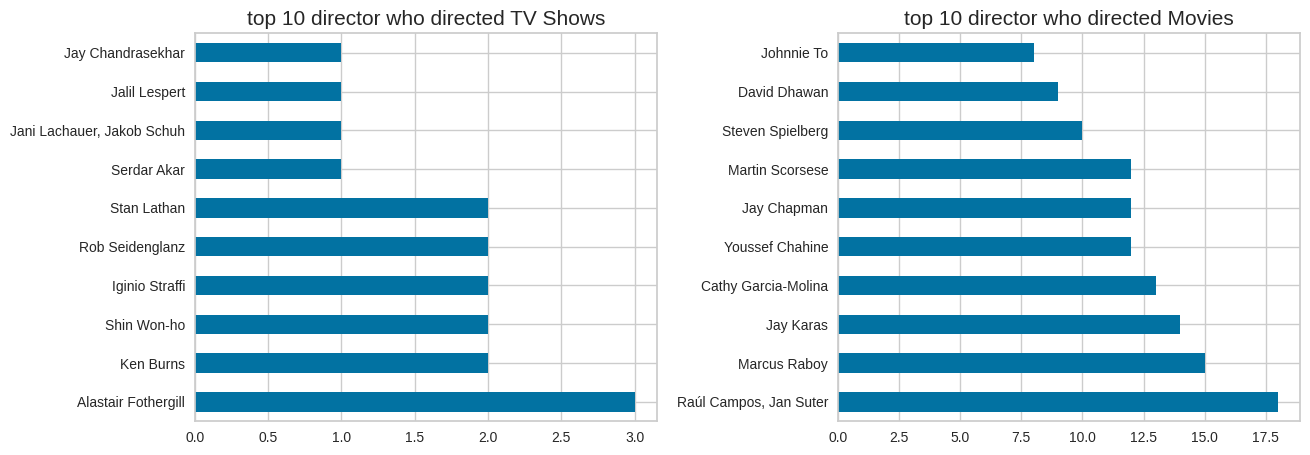

In [127]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# top 10 directors who directed Movies
movies = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('top 10 director who directed Movies', size=15)

# top 10 directors who directed TV shows
tv_shows = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
tv_shows.set_title('top 10 director who directed TV Shows', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()



##### 1. Why did you pick the specific chart?

We have used bar plot to categorically evaluate and compare the data under director column.

##### 2. What is/are the insight(s) found from the chart?

- Alastair Fothergill has 3 shows under his name and is the top most director when it comes to TV Shows.
- Jan Suter and Raul Campos have directed 18 films, more than anyone else in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 | Exploring the feature 'Cast'

In [128]:
# Chart - 4 visualization code

df['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                  NaN
Name: cast, Length: 7787, dtype: object

In [129]:
# seperating actors from cast column
cast = df['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Length: 32881, dtype: int64

In [130]:
print(f"Number of Movies actors present in the dataset: {len(df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().value_counts())}")
print(f"Number of TV Shows actors present in the dataset: {len(df[df['type']=='TV Show']['cast'].str.split(', ',expand=True).stack().value_counts())}")


Number of Movies actors present in the dataset: 23049
Number of TV Shows actors present in the dataset: 13585


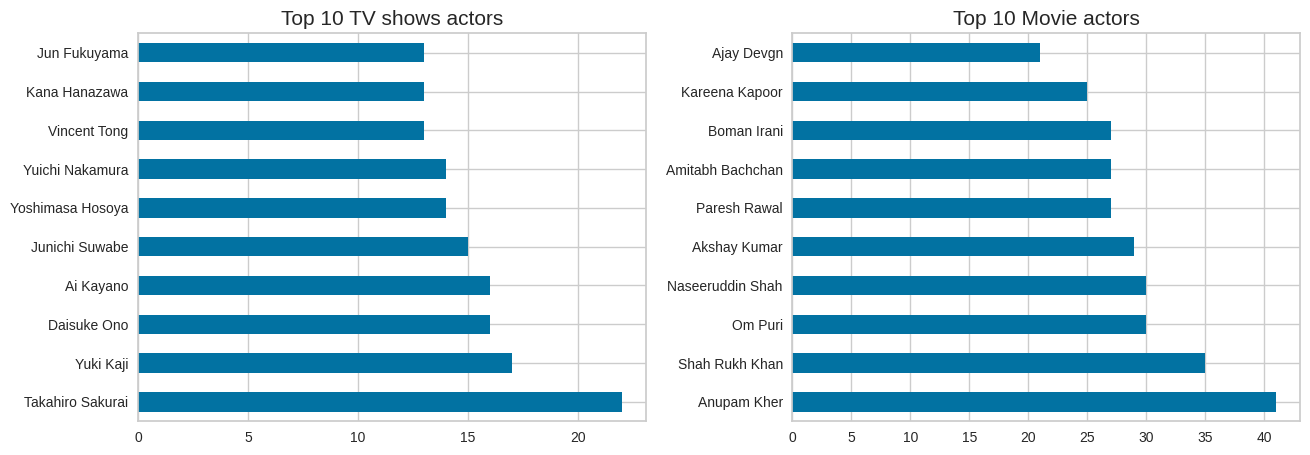

In [131]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating movie actor from cast column
top_movie_actor = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)

# seperating TV shows actor from cast column
top_TVshows_actor = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV shows actors', size=15)


plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

- Anupam Kher, Shahrukh Khan, and Om Puri have played maximum roles in the movies.
- When in comes to TV Shows, Takahiro Sakurai, Yuki Kaji, and Daisuke Ono played the maximum number of roles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- We are able to place the most popular actors from the list.

#### Chart - 5 | Exploring the feature 'Country'

In [132]:
# Chart - 5 visualization code

# number of unique values
df['country'].nunique()

681

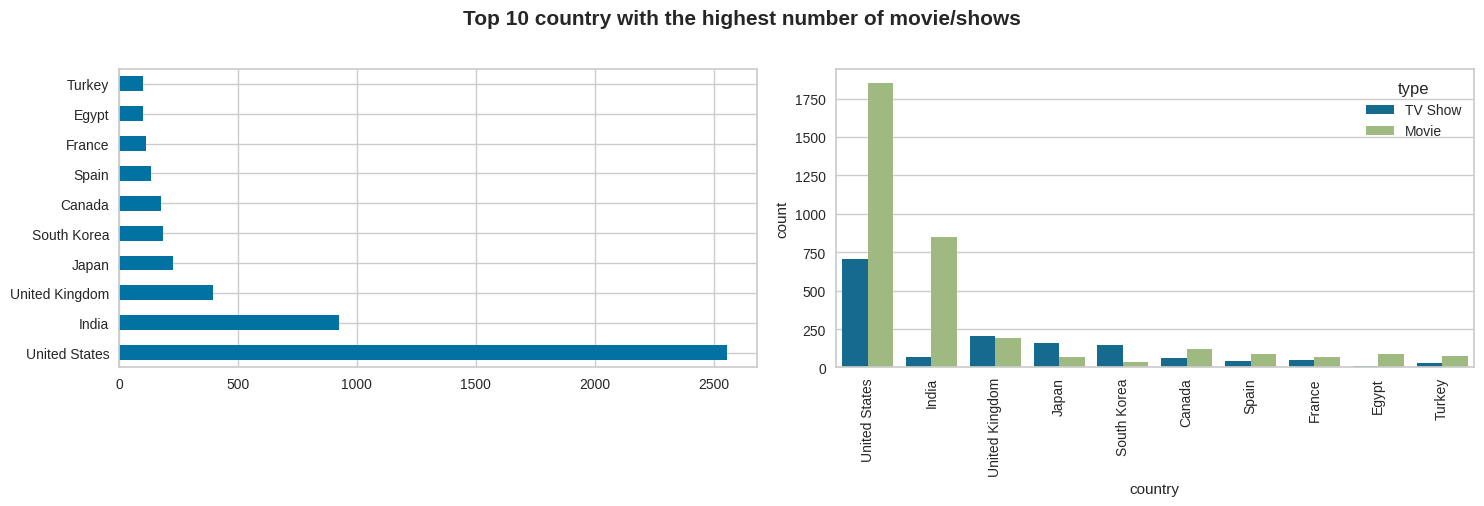

In [133]:

fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Top 10 country with the highest number of movie/shows', weight='bold', size=15, y=1.01)

# univariate analysis
df['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="country", data=df, hue='type', order=df['country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This bar chart helps us to understand which all countries caters the most to the netflix audience.

##### 2. What is/are the insight(s) found from the chart?

The United States-based movies and TV shows were produced most, followed by India and the United Kingdom.
In India and United State, a greater number of movies are present compared to TV shows.
In the UK, Japan, and South Korea there are a greater number of TV shows than movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 | Exploring the feature 'Release Year'

In [134]:
# Chart - 6 visualization code

# number of unique values
df['release_year'].nunique()

73

In [135]:

print(f'Year of oldest release  : {df.release_year.min()}')
print(f'Year of latest release : {df.release_year.max()}')


Year of oldest release  : 1925
Year of latest release : 2021


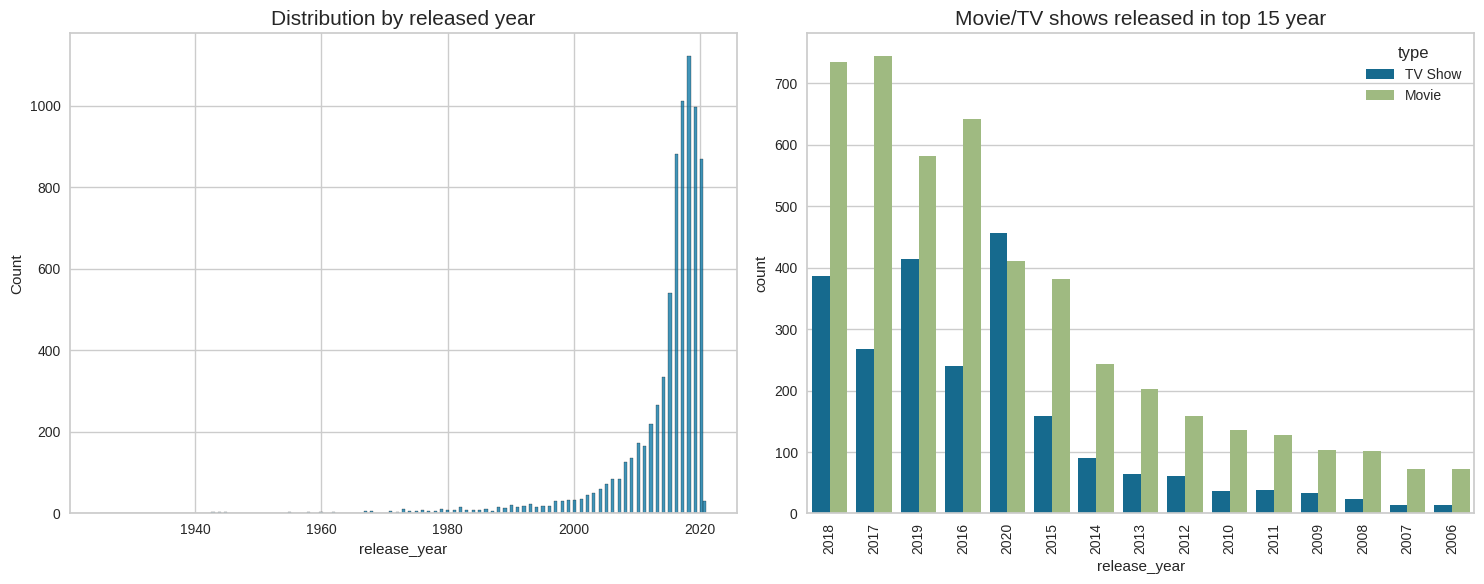

In [136]:

fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.histplot(df['release_year'], ax=ax[0])
hist.set_title('Distribution by released year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=df, order=df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

- Netflix started becoming more popular among audience since 2014 after which we can see a steep increase in both movie and TV Show productions.
- Most Movies and TV shows are available on Netflix between 2015 and 2020, and the highest are in 2018.
- 2017 marks the highest for movies and 2020 for TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

TV shows have started getting more popularity.

#### Chart - 7 | Exploring the feature 'Rating'

In [137]:
# Chart - 7 visualization code
# number of unique values
df.rating.nunique()

14

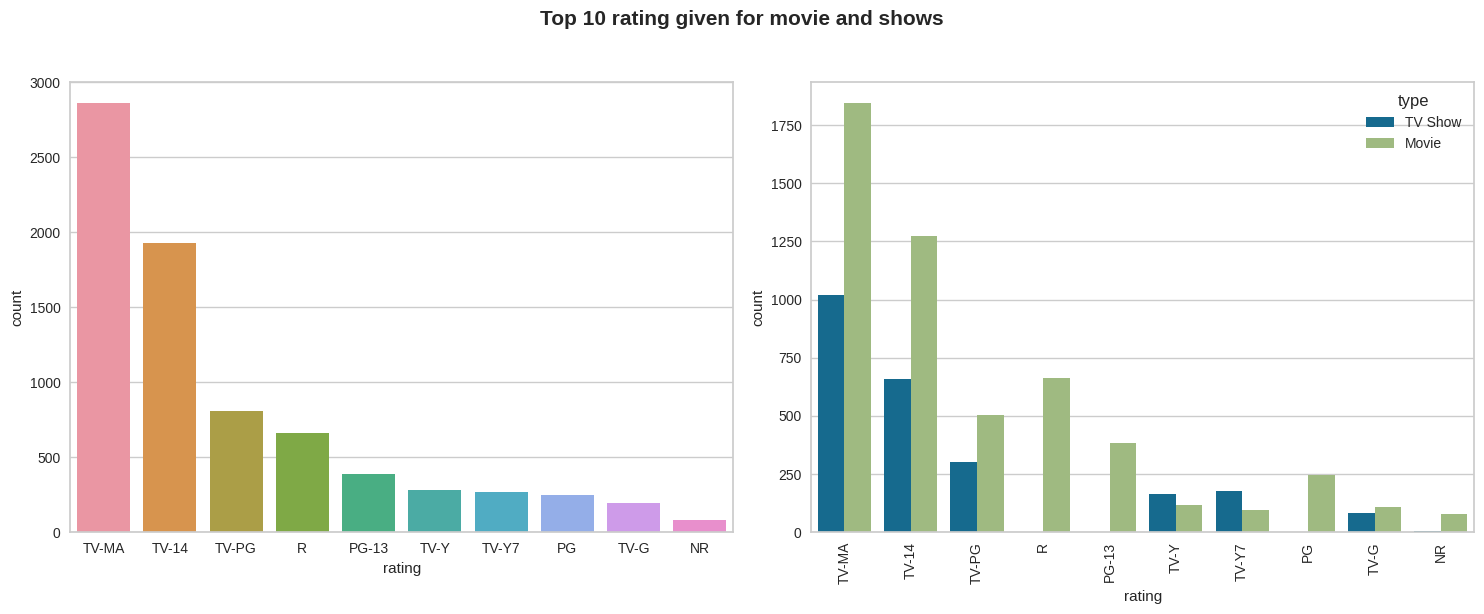

In [138]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', y=1.02, size=15)

# univariate analysis
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

- The majority of Movies and TV shows have a rating of TV-MA, which stands for "Mature Audience," followed by TV-14, which stands for "Younger Audience."
- When compared to TV shows, Movies receive the highest rating,as the  number of Movies are higher compared to TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We are getting an idea about audience preferences.

#### Chart - 8 | Exploring the feature 'Listed in'

In [139]:
# Chart - 8 visualization code
df['listed_in'].head()


0    International TV Shows, TV Dramas, TV Sci-Fi &...
1                         Dramas, International Movies
2                  Horror Movies, International Movies
3    Action & Adventure, Independent Movies, Sci-Fi...
4                                               Dramas
Name: listed_in, dtype: object

In [140]:
# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()

,genre,count
0,International Movies,2437
1,Dramas,2106
2,Comedies,1471
3,International TV Shows,1199
4,Documentaries,786


In [141]:
# number of genres present in dataset
len(genres)


42

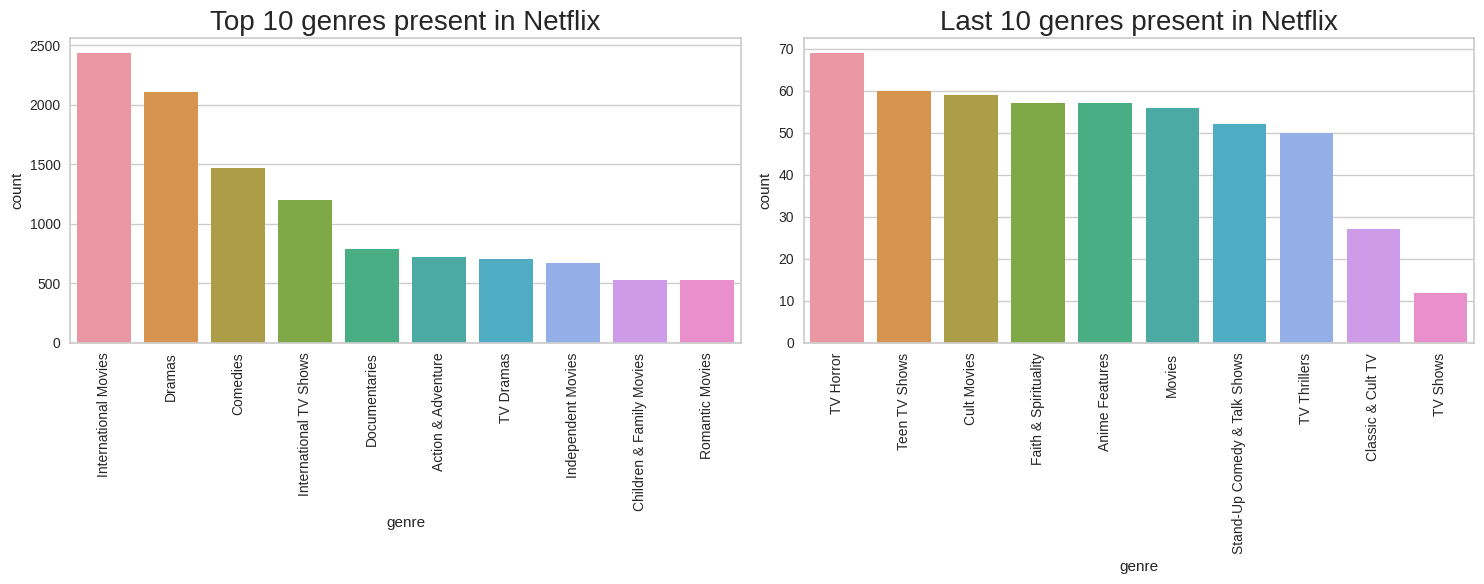

In [142]:

# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Top 10 genres
top = sns.barplot(x='genre', y = 'count', data=genres[:10], ax=ax[0])
top.set_title('Top 10 genres present in Netflix', size=20)
plt.setp(top.get_xticklabels(), rotation=90)

# Last 10 genres
bottom = sns.barplot(x='genre', y = 'count', data=genres[-10:], ax=ax[1])
bottom.set_title('Last 10 genres present in Netflix', size=20)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

International Movies, Dramas, and Comedies make up the most popular genres.
TV Shows, Classic and cult TV, TV thrillers, Stand-Up comedy, and Talk shows account for the least popular genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 | Exploring the feature 'Description'

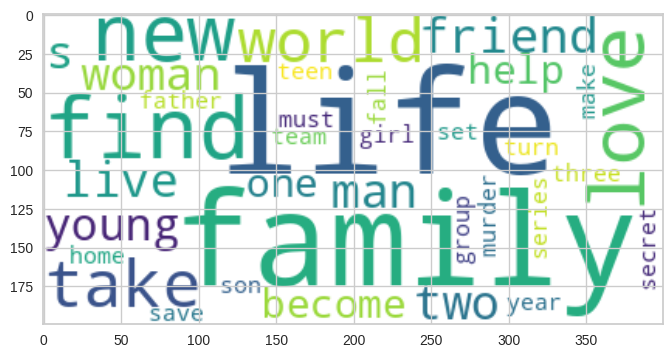

In [143]:
# Chart - 9 visualization code

# text documents
text = " ".join(word for word in df['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

To understand the most used words in the description of the movies/tv shows.

##### 2. What is/are the insight(s) found from the chart?

'Love', 'Life', 'Family', 'Find', 'Make', 'New', 'Friends', etc.. are the most recurring words under description.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These words can be incorporated which writing the description of upcoming movies.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [144]:
# Handling Missing Values & Missing Value Imputation
print(df.isnull().sum())


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [145]:
round(df.isna().sum()/len(df)*100, 2)

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [146]:
df[['director','cast','country']] = df[['director','cast','country']].fillna(' ')
df.dropna(axis=0, inplace=True)

In [147]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

- Since each column should have different meaned words using mode to fill the columns is not viable. So we use the "empty string" to replace the missing values in the director, cast, and country attributes.
- There is a small percentage of null values in the rating and date_added columns; eliminating these nan values will have little effect on the model's construction. So, the nan value in the rating and date_added columns is simply removed.

### 2. Handling Outliers

<Axes: >

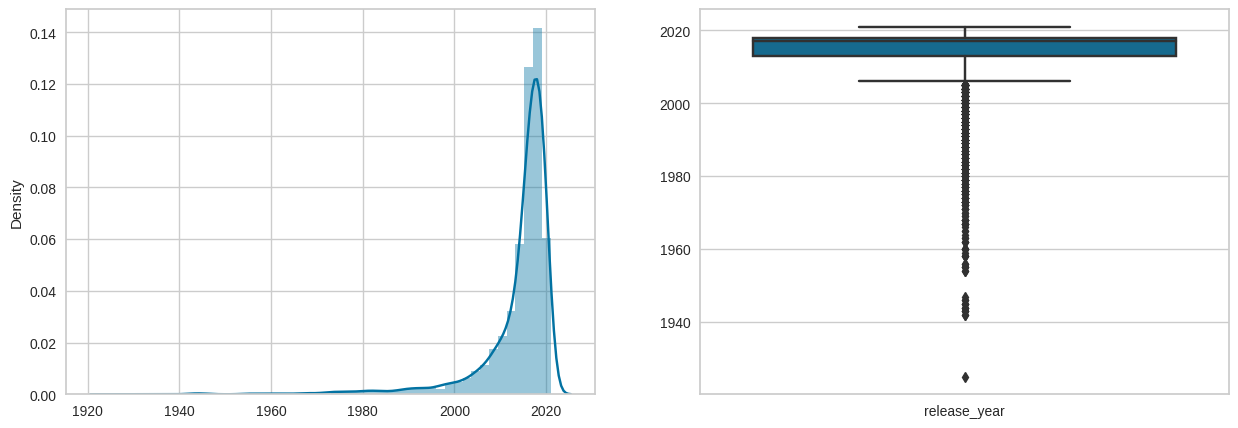

In [148]:
# Handling Outliers & Outlier treatments

# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x= df['release_year'], ax=ax[0])
sns.boxplot(data= df, ax=ax[1])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Except for the release year, almost all of the data are presented in text format.
The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

APPROACH

- Choose the attributes that we wish to cluster.

- Text Preprocessing: Change all textual data to lowercase and eliminate all punctuation marks and stopwords. Removing commonly occurring words such as "the", "and", "a", etc. that don't carry much meaning.

- Stemming or Lemmatization: Normalizing the words by reducing them to their base form.

- Tokenization: Breaking the text into smaller units, such as sentences or words.

- Dimensionality reduction.

- Make use of various algorithms to cluster the movies and various techniques to determine the optimal number of clusters.

- Build the optimal number of clusters and use wordclouds to display the contents of each cluster.

#### 1. Feature Selection

In [149]:
# Select your features wisely to avoid overfitting
df.head(3)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [150]:

# creating tags column using all text column which one is used for model building purpose.
df['text_data'] = df['director'] + df['cast'] + df['country'] + \
                     df['rating'] + df['listed_in'] + df['description']

In [151]:

# checking the first row
df['text_data'][0]

' João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazilTV-MAInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

We clustered the Netflix movies and TV shows into groups based on the following textual characteristics:

- Director
- Cast
- Country
- Rating
- Listed in (genres)
- Description

We were able to successfully consolidagete all of the required data into a single column.

#### 2. Removing Punctuations

In [152]:
# Remove Punctuations
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)


In [153]:

# applying remove_punctuation function
df['text_data'] = df['text_data'].apply(remove_punctuation)

In [154]:

# checking the first row after the process
df['text_data'][0]

' João Miguel Bianca Comparato Michel Gomes Rodolfo Valente Vaneza Oliveira Rafael Lozano Viviane Porto Mel Fronckowiak Sergio Mamberti Zezé Motta Celso FrateschiBrazilTVMAInternational TV Shows TV Dramas TV SciFi  FantasyIn a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

#### 3. Removing Stopwords & Lower Casing

In [155]:
# Remove Stopwords

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [156]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [157]:

# applying stopwords function.
df['text_data'] = df['text_data'].apply(stopwords)

In [158]:

# checking the first row again
df['text_data'][0]

'joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmainternational tv shows tv dramas tv scifi fantasyin future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

#### 4. Text Normalization

In [159]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

#We will utilize SnowballStemmer to construct a meaningful word from a word corpus.

# create an object of stemming function
stemmer = SnowballStemmer("english")

# define a function to apply stemming using SnowballStemmer
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [160]:

# appying stemming function
df['text_data'] = df['text_data'].apply(stemming)

In [161]:
# checking the first row after the process
df['text_data'][0]

'joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmaintern tv show tv drama tv scifi fantasyin futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

##### Which text normalization technique have you used and why?

I have used stemming here. The goal of stemming is to reduce words to their base form so that words with the same stem are treated as the same word, even if they are written in different forms.

#### 5. Text Vectorization

In [162]:
# Vectorizing Text
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(df['text_data'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()



In [163]:

print(len(dictionary))
#number of independet features created from "text_data" columns

10000


In [164]:

# convert vector into array form for clustering
vector = tfidf.transform(df['text_data']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7770, 10000)
datatype : <class 'numpy.ndarray'>


##### Which text vectorization technique have you used and why?

- We used the TF-IDF vectorizer, which stands for Term Frequency Inverse Document Frequency

- The product of TF and IDF is used to calculate the overall weight of a word in a document, which is known as the TF-IDF score. Words with high TF-IDF scores are considered to be more important and relevant to the document than words with low TF-IDF scores.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, Dimensionality reduction is required as we have so many features present in this dataset among which few can be removed.

In [165]:
# DImensionality Reduction (If needed)
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(vector)


PCA(random_state=42)

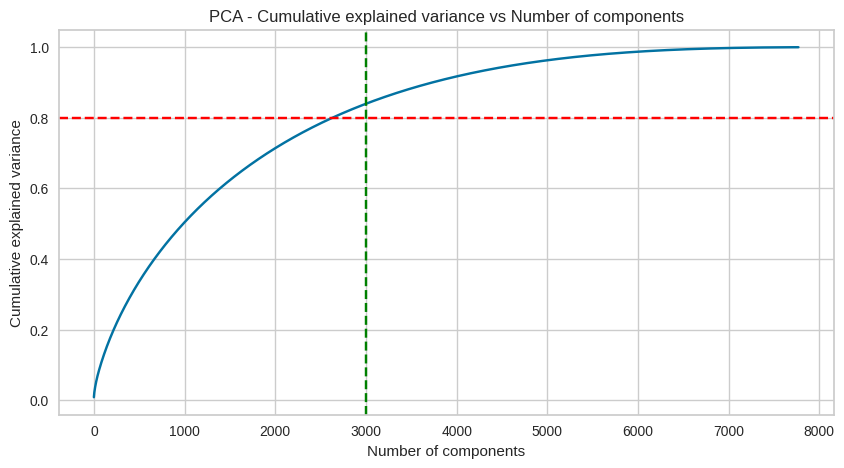

In [166]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()


In [167]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(vector)

PCA(n_components=3000, random_state=42)

In [168]:

# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

(7770, 3000)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We discover that approximately 7500 components account for 100 percent of the variance.
3000 components alone account for more than 80% of the variance.
Therefore, we can take the top 3000 components to reduce dimensionality and simplify the model while still being able to capture more than 80% of the variance.

## ***7. ML Model Implementation***

### ML Model - K-Means Clustering

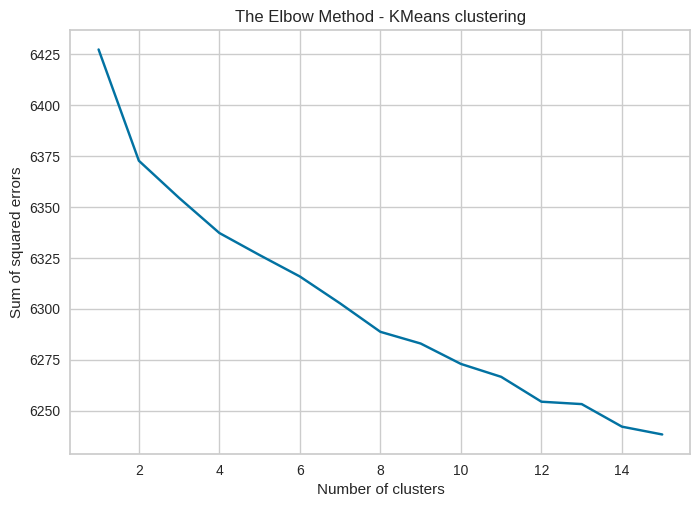

In [169]:
# ML Model - 1 Implementation
'''Elbow method to find the optimal value of K'''

# Initialize a list to store the sum of squared errors for each value of K
SSE = []

for k in range(1, 16):
  # Initialize the k-means model with the current value of K
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the values of SSE
plt.plot(range(1, 16), SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()


In [ ]:
'''Silhouette score method to find the optimal value of k'''

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)

# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [ ]:

# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=33)
kmeans.fit(X)

In [ ]:
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

In [ ]:

# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_


In [ ]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]


In [ ]:

# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

Building wordclouds for different clusters in K-Means Clustering

In [ ]:
def kmeans_worldcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  df_wordcloud = df[['kmeans_cluster',column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [ ]:
#Word Cloud on "description" column for different cluster


for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'description')


In [ ]:
#Word Cloud on "cast" column for different cluster


for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'cast')

In [ ]:
#Word Cloud on "director" column for different cluster


for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'director')

In [ ]:
#Word Cloud on "listed_in" (genre) col for different cluster


for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'listed_in')

In [ ]:
#WordCloud on "country" column column for different cluster


for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'country')

In [ ]:
#Word Cloud on "title" column column for different cluster


for i in range(6):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'title')


### ML Model -  Hierarchical clustering

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Building a dendogram to decide the number of clusters
plt.figure(figsize=(10, 5))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4, color='r', linestyle='--')

At a distance of 4 units, 7 clusters can be built using the agglomerative clustering algorithm.

Building 7 clusters using the Agglomerative clustering algorithm:

In [ ]:

# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(X)



In [ ]:

# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]


In [ ]:

# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data= df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

Successfully built 7 clusters using the Agglomerative (hierarchical) clustering algorithm.

In [ ]:

def hierarchical_worldcloud(cluster_number, column_name):

  '''function for Building a wordcloud for the movie/shows'''

  df_wordcloud = df[['hierarchical_cluster',column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['hierarchical_cluster']==cluster_number]

  # text documents
  text = " ".join(word for word in df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)

  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [ ]:
#Word Cloud on "title" column for different cluster


for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'title')

In [ ]:
#Word Cloud on "description" column for different cluster


for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'description')


In [ ]:
#Word Cloud on "cast" column for different cluster


for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'cast')


In [ ]:
#Word Cloud on "country" column for different cluster


for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'country')

In [ ]:
#Word Cloud on "listed_in (genre)" column for different cluster


for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'listed_in')

### 8. Recommendation System


A content-based recommendation system is a type of recommendation system that suggests items to users based on their similarity to other items that the user has shown interest in. It uses the attributes or features of the items to determine the similarity between them.

Based on how similar the movies and shows are, we can create a straightforward content-based recommender system.
The recommender system needs to be able to suggest a list of similar shows that a person who has watched a show on Netflix likes.


In [ ]:

# veryfying index
df[['show_id', 'title', 'text_data']]

Our dataframe has a total of 7770 rows, as shown above, and the last index is 7786 due to the deletion of some rows while treating null values.

In order to construct a content-based recommendation system, we determine the similarity score based on a specific index_id for that particular "tags" column.

If we are unable to reset the index, there is a good chance that instead of providing an index, we will calculate cosine similarity for another index. in order to avoid this issue and properly address index when developing the recommendation system. The index was simply reset.

In [ ]:

# defining new dataframe for building recommandation system
recommender_df = df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# checking whether or not reset index properly
recommender_df[['show_id', 'title', 'text_data']]


As shown in the dataframe above, the index was successfully reset. The dataset can now be used to construct a content-based recommendation system.

In [ ]:

# dropping show-id and index column
recommender_df.drop(columns=['index', 'show_id'], inplace=True)

In [ ]:
print(f"before reset index id for movie 'Zero' : {df[df['title'] == 'Zozo'].index[0]}")
print(f"after reset index id for movie 'Zero': {recommender_df[recommender_df['title'] == 'Zozo'].index[0]}")

In [ ]:
# calling out transformed array independent features created from text_data(cluster) column after performing PCA for dimenssionality reduction.
X

In [ ]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity


In [ ]:

def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df.iloc[i[0]].title)

In [ ]:
recommend('Zubaan')

In [ ]:
recommend('Crash Landing on You')

# **Conclusion**


- In this project, we addressed the task of grouping Netflix shows into distinct categories based on their similarities. This involved organizing approximately 7787 records with 11 different attributes.

- Our process began by addressing any missing information and conducting an exploratory analysis of the data. This revealed that Netflix predominantly features movies over television shows, and the library is rapidly expanding. Furthermore, a majority of the content originates from the United States.

- To perform the clustering, we selected specific attributes as the foundation, including cast, country, genre, director, rating, and description. These attributes were transformed using TFIDF vectorization, resulting in a total of 10000 unique features. To manage dimensionality, we applied Principal Component Analysis (PCA) and retained 3000 components, accounting for over 80% of the variance.

- We employed the K-Means Clustering algorithm, determining the optimal number of clusters to be 6 through the elbow method and Silhouette score analysis. Subsequently, we applied the Agglomerative clustering algorithm, identifying 7 clusters by visualizing the dendrogram.

- Using cosine similarity, we created a similarity matrix, which served as the foundation for a content-based recommender system. This system generates ten tailored recommendations for users based on their viewing preferences.




